In [12]:
import requests
import json
import base64

In [13]:
def encode_image_to_base64(image_path):
    """
    Кодирует изображение в строку Base64.
    
    :param image_path: Путь к файлу изображения.
    :return: Строка, закодированная в Base64.
    """
    with open(image_path, "rb") as image_file:
        base64_encoded = base64.b64encode(image_file.read()).decode('utf-8')
    return base64_encoded

def send_image_to_mlserver(image_path, url):
    """
    Отправляет POST запрос на MLServer с изображением в формате Base64.
    
    :param image_path: Путь к файлу изображения.
    :param url: URL MLServer для обработки запросов.
    :return: Ответ сервера.
    """
    # Кодирование изображения
    encoded_image = encode_image_to_base64(image_path)

    # Формирование тела запроса
    request_data = {
        "inputs": [
            {
                "name": "image",
                "shape": [1],
                "datatype": "BYTES",
                "data": [encoded_image]
            }
        ]
    }

    # Отправка запроса на MLServer
    response = requests.post(url, json=request_data)
    return response.json()



In [80]:
# Пример использования
image_path = './image.jpeg'
mlserver_url = 'http://localhost:8080/v2/models/yolov8-model/infer'  # Проверьте URL и порт вашего MLServer
response = send_image_to_mlserver(image_path, mlserver_url)

In [81]:
response

{'model_name': 'yolov8n',
 'model_version': 'v1',
 'id': 'e3410327-fa5b-420d-8dbe-402002c14e69',
 'parameters': {},
 'outputs': [{'name': 'boxes',
   'shape': [3, 4],
   'datatype': 'FP32',
   'data': '[[727.442626953125, 296.5689697265625, 213.09967041015625, 417.04437255859375], [496.6354675292969, 291.6626281738281, 237.58905029296875, 429.21588134765625], [254.6930694580078, 322.3876953125, 266.9605407714844, 362.1322021484375]]'},
  {'name': 'probs',
   'shape': [3],
   'datatype': 'FP32',
   'data': '[0.9213695526123047, 0.9098036289215088, 0.9069948196411133]'},
  {'name': 'cls',
   'shape': [3],
   'datatype': 'FP32',
   'data': '[16.0, 16.0, 15.0]'}]}

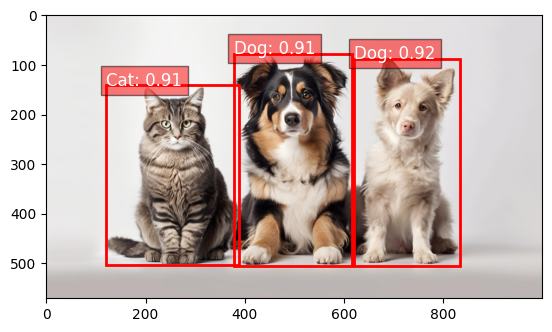

In [83]:
# Parse the JSON data
boxes = json.loads(response['outputs'][0]['data'])
probs = json.loads(response['outputs'][1]['data'])
classes = json.loads(response['outputs'][2]['data'])

# Class labels (you can expand this dictionary according to your model's classes)
class_labels = {
    15: 'Cat',
    16: 'Dog'
}

# Load your image
img = Image.open(image_path)
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Draw each bounding box
for box, prob, cls in zip(boxes, probs, classes):
    x, y, w, h = box
    rect = patches.Rectangle((x-w/2, y-h/2), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    # Annotation for class label and probability
    label = f"{class_labels[int(cls)]}: {prob:.2f}"
    plt.text(x-w/2, y-h/2, label, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

# Show the plot
plt.show()
